In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import COASTLINE, LAND
from netCDF4 import Dataset
from pynextsim.nextsim_bin import NextsimBin
from pynextsim.projection_info import ProjectionInfo
from pyresample import bilinear
from pyresample.geometry import AreaDefinition
from pyresample.utils import load_cf_area

In [2]:
nc_ds = Dataset('ice_conc_nh_polstere-100_multi_202106131200.nc')
nc_area, _ = load_cf_area('ice_conc_nh_polstere-100_multi_202106131200.nc')
cons_from_nc_file = nc_ds['ice_conc'][0]
NS_PROJ = ProjectionInfo()
nb = NextsimBin('field_1.bin')
grid_params = nb.get_grid_params()
grid_params

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:1216: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:1216: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


{'xmax': 1653262.0694874537,
 'ymax': 2012099.1662464296,
 'xmin': -2252234.820389867,
 'ymin': -1177649.28962947,
 'nx': 502,
 'ny': 410}

In [3]:
dict_for_area_definition ={
'area_id': 'id',
'description': 'desc',
'proj_id': 'proj_id',
'projection': {
    'proj': NS_PROJ.proj, 'lat_0': NS_PROJ.lat_0, 'lon_0': NS_PROJ.lon_0, 'a': NS_PROJ.a, 'units': 'm'
             },
'width': grid_params['nx'],
'height': grid_params['ny'],
'area_extent': (grid_params['xmin'], grid_params['ymin'], grid_params['xmax'], grid_params['ymax'])
}
nextsim_file_area = AreaDefinition(**dict_for_area_definition)
nextsim_file_area

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:1216: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


Area ID: id
Description: desc
Projection ID: proj_id
Projection: {'R': '6378273', 'k': '1', 'lat_0': '90', 'lon_0': '-45', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 502
Number of rows: 410
Area extent: (-2252234.8204, -1177649.2896, 1653262.0695, 2012099.1662)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:1216: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/opt/conda/lib/python3.8/site-packages/pyresample/bilinear/_base.py:386: RuntimeWarning: invalid value encountered in true_divide
  x_1 = (-b__ + np.sqrt(discriminant)) / (2 * a__)
/opt/conda/lib/python3.8/site-packages/pyresample/bilinear/_base.py:387: RuntimeWarning: divide by zero encountered in true_divide
  x_2 = (-b__ - np.sqrt(discriminant)) / (2 * a__)
/opt/conda/lib/python3.8/site-packages/pyresample/bilinear/_base.py:453: RuntimeWarning: divide by zero encountered in true_divide
  g__ = ((out_y - y_1 - y_21 * f__) /
/opt/conda/lib/python3.8/site-packages/pyresample/bilinear/_base.py:386: RuntimeWarning: divide by zero encountered in true_divide
  x_1 = (

resampled_data.shape: (410, 502)
cons_from_nc_file.shape: (1120, 760)


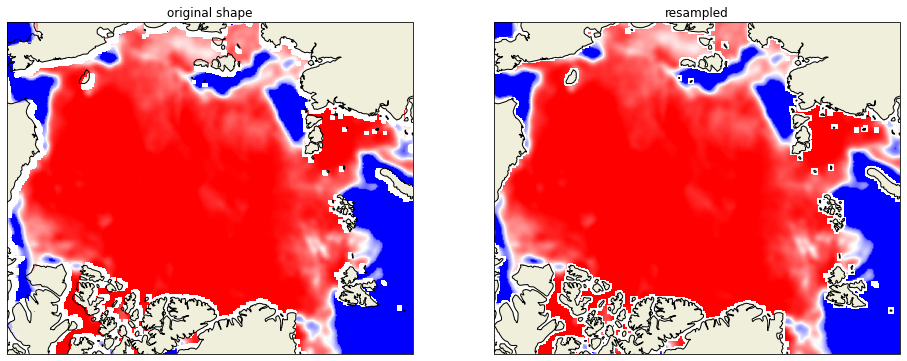

In [4]:
bilinear_ = bilinear.NumpyBilinearResampler(nc_area, nextsim_file_area, radius_of_influence=15000)
resampled_data = bilinear_.resample(cons_from_nc_file)
print("resampled_data.shape: "+str(resampled_data.shape))
print("cons_from_nc_file.shape: "+str(cons_from_nc_file.shape))

imgs = [cons_from_nc_file, resampled_data]
nc_crs = nextsim_file_area.to_cartopy_crs()
nc_crs2 = nc_area.to_cartopy_crs()
figsize = (16,8)
fig, ax = plt.subplots(1,2, figsize=figsize, subplot_kw={'projection': nc_crs})
titles = ['original shape', 'resampled']
extents = [
    nc_crs2.bounds,
    nc_crs.bounds,
]
cmaps = [
    'bwr',
    'bwr',
]
for i in range(2):
    ax[i].imshow(imgs[i],  cmap=cmaps[i], extent=extents[i])
    ax[i].add_feature(COASTLINE)
    ax[i].add_feature(LAND)
    ax[i].set_title(titles[i])
plt.show()